In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("abalone.csv")

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


by the problem statement we have to measure the Rings of the Abaone so that it tells us its age

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
data.shape

(4177, 9)

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there are no null values in the data, lets check with the heatmap plot

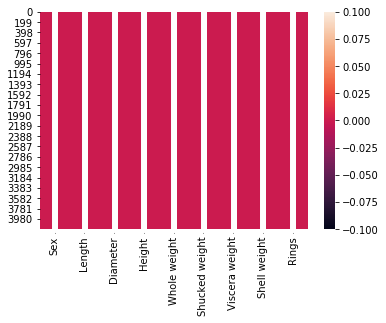

In [7]:
sns.heatmap(data.isnull(), annot = True)

In [8]:
data["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [9]:
data["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

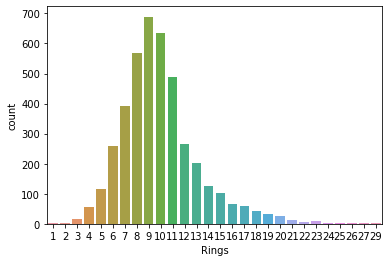

In [10]:
sns.countplot(x = "Rings", data = data)

As we can see these are count values of all rings

In [11]:
data["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [12]:
sexmap = {'M' : 0, 'F' : 1, 'I' : 2}
data["sex"] = data["Sex"].map(sexmap)

In [13]:
data = data.drop(columns = ["Sex"], axis = 1)


lets start analysing the data 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   sex             4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


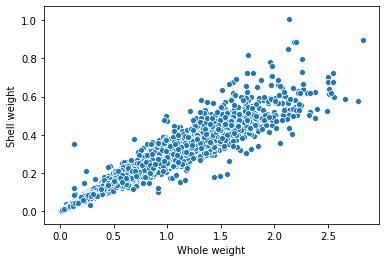

In [15]:
sns.scatterplot(x = "Whole weight", y = "Shell weight", data = data)

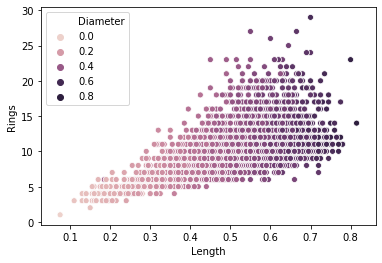

In [16]:
sns.scatterplot(y = "Rings", x = "Length", hue = "Diameter", data = data)

As the length and diameter increases rings on the abalone rings increases


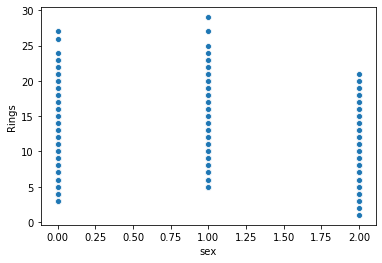

In [17]:
sns.scatterplot(y = "Rings", x = "sex", data = data)

we can see from the plot male/0 and female/1 rings are increaes when compared to Infaunts/2

now lets check the correlation of data

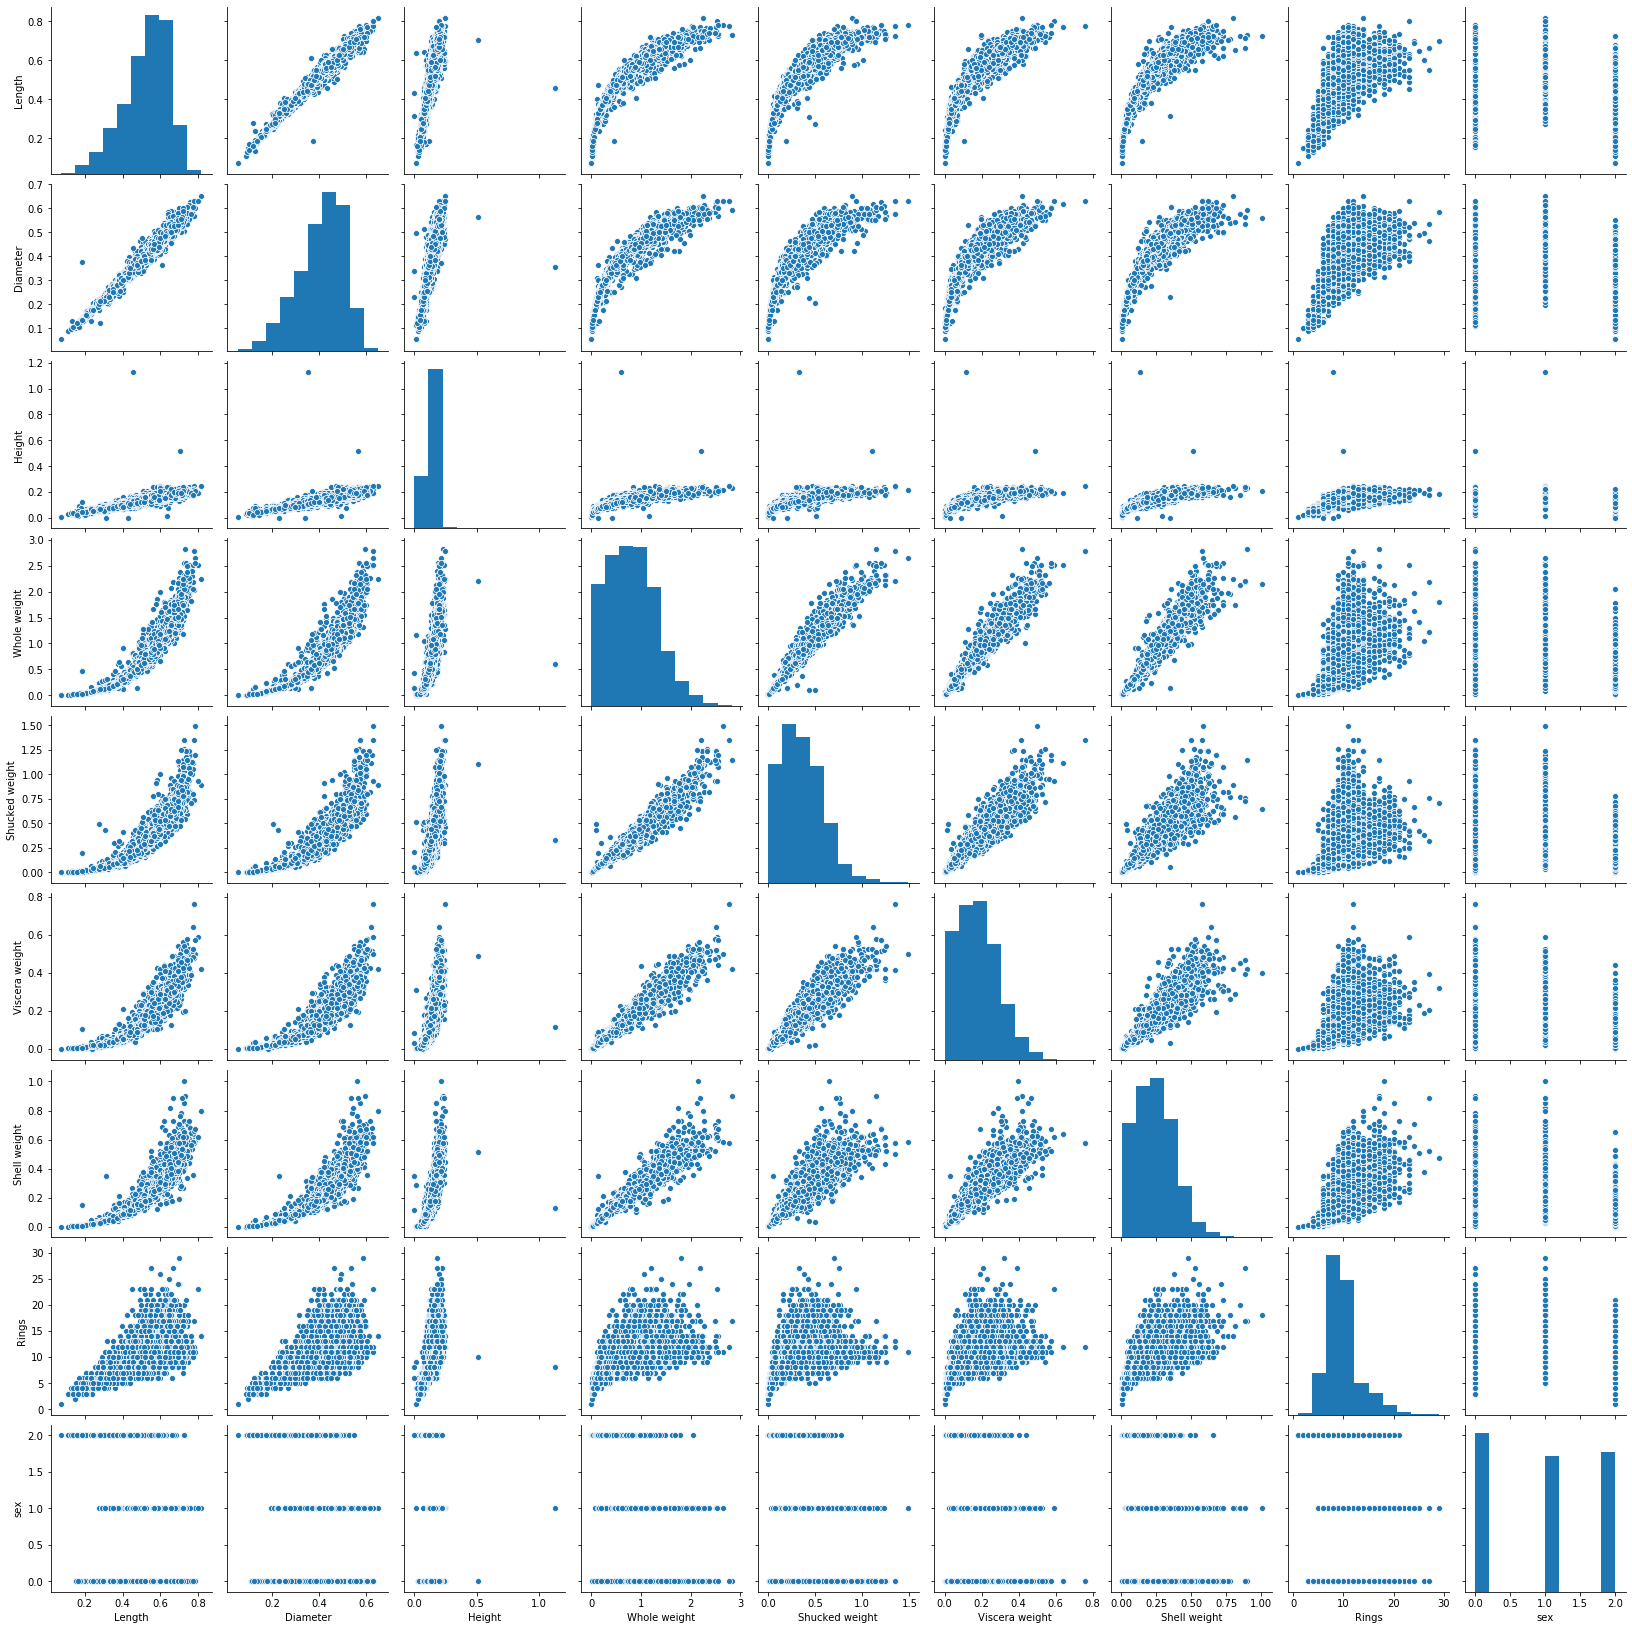

In [18]:
sns.pairplot(data)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
sex,4177.0,0.955470,0.827815,0.0000,0.0000,1.0000,2.000,2.0000


Describe function shows us about data distribution, skewnes and data about mean and std,
in this data there is some skewness as we can see that there is huge difference between mean and Std
lets check the correlation and skewness

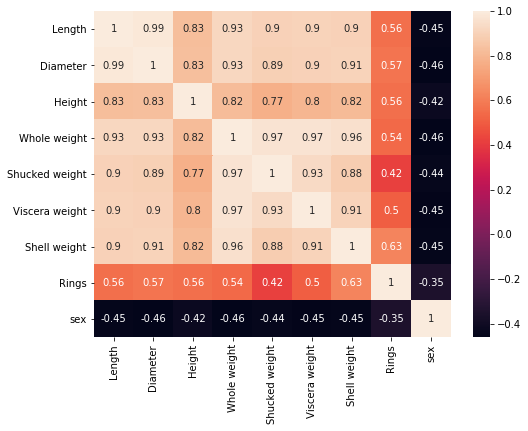

In [20]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True)

In [21]:
def corellation(dataset, threshold):
    col_corr = set() #set of all correlated values
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    
corr_fea = corellation(data, 0.95)
print(corr_fea)
    

{'Shell weight', 'Shucked weight', 'Diameter', 'Viscera weight'}


we have created a function to check to schec highly correlated values and returned in a set

there is no necessary to to drop these columnsi f they present they will be treated as dummy coumns as they have same corellation

lets check the outliers in data

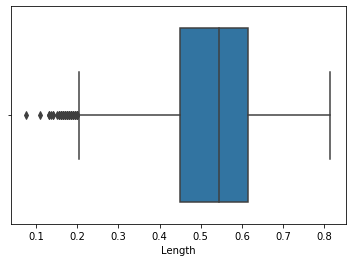

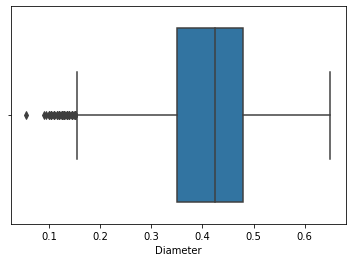

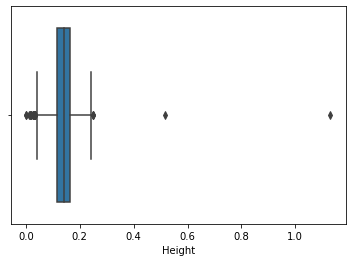

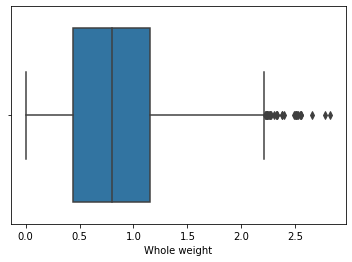

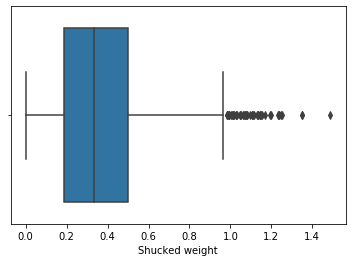

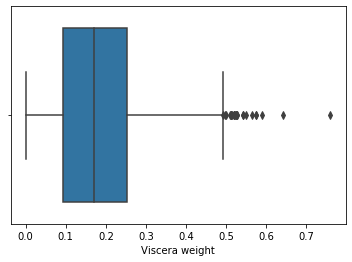

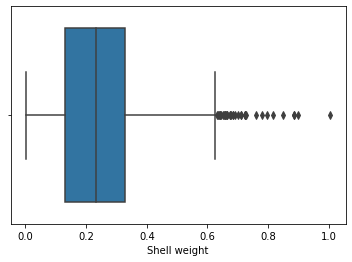

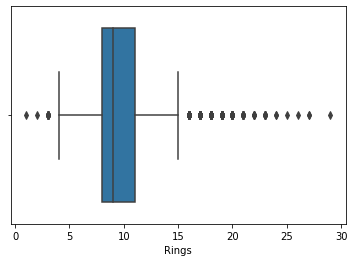

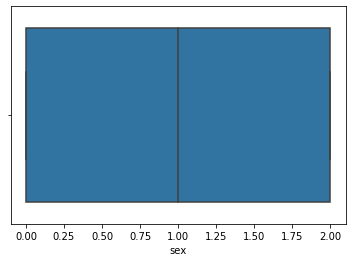

In [22]:
for i in data:
    sns.boxplot(data[i])
    plt.show()

we have some outliers in the data so lets reduce them

In [23]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
print(np.where(z > 3))
newdata = data[(z < 3).all(axis=1)]
print("data before :", data.shape)
print("data after :", newdata.shape)
data = newdata

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

we have removed some outliers and lets continue with dividing the datase

In [24]:
x = data.drop(columns=["Rings"], axis = 1)
y = data["Rings"]
print(x.shape,y.shape)

(4027, 8) (4027,)


In [25]:
x.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
sex               0.062158
dtype: float64

In [26]:
from sklearn.preprocessing import power_transform
new = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns=x.columns)
x = new
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,sex
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354,-1.214480
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717,-1.214480
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214,0.165231
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533,-1.214480
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926,1.181474
...,...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258,0.165231
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936,-1.214480
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632,-1.214480
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520,0.165231


In [27]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
newdata = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = newdata
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,sex
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354,-1.214480
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717,-1.214480
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214,0.165231
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533,-1.214480
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926,1.181474
...,...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258,0.165231
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936,-1.214480
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632,-1.214480
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520,0.165231


I have used standardscalar to make data into standardised form because all the machine learning models are designed to deal with standard normal distribution

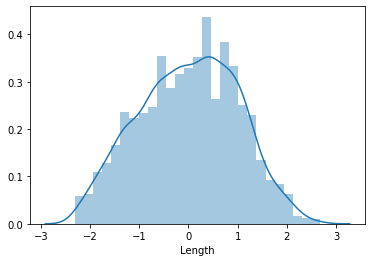

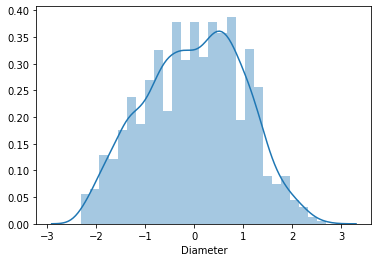

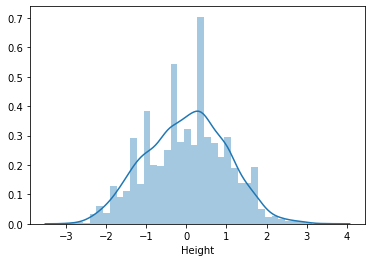

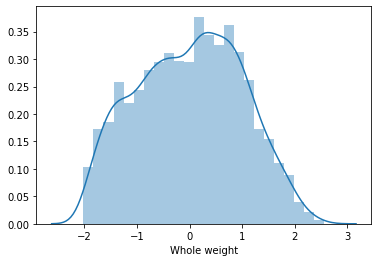

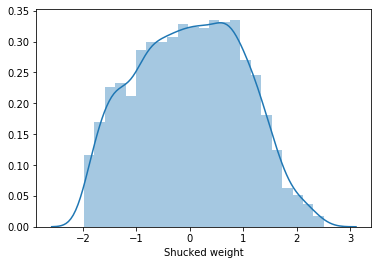

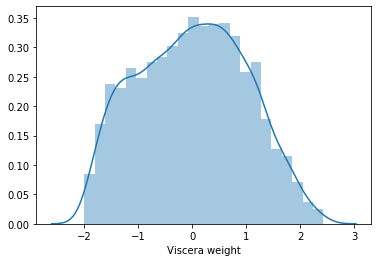

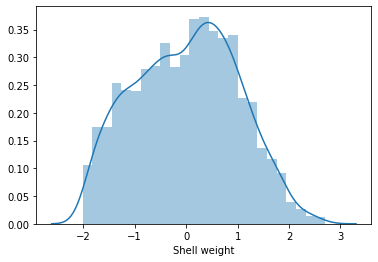

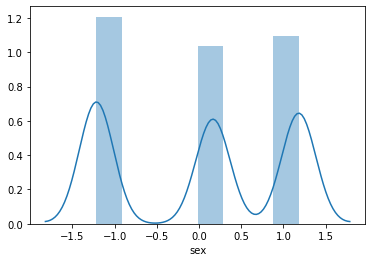

In [28]:
for i in x:
    sns.distplot(x[i])
    plt.show()

By the plot we can tell data is standardised and we can proceed with the model creation

In [29]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
seed = 7


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed, test_size = 0.20)

In [31]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3221, 8), (3221,), (806, 8), (806,))

In [32]:
models = []
models.append(('linear regression', LinearRegression()))
models.append(('lasso', Lasso()))
models.append(('ridge', Ridge()))



results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

linear regression: 0.521797, 0.032057
lasso: 0.290697, 0.024231
ridge: 0.522040, 0.032036


In [33]:
lr = LinearRegression()
l = Lasso()
r = Ridge()

score : 52.81988031619188
[ 7.53097861  5.89574683 12.48062456 12.11999503 10.33692858 11.23189677
 14.7830243  13.44951584  7.22370968 10.05475241  9.71513441  9.8871962
  8.78789763  6.48170372 10.12198484 12.24179109  6.56090867  8.11831685
 11.25622382  8.57832904 10.32864162 14.67007242 11.33045902  7.05880826
  7.9228631  14.04727151  9.26189127  9.91449659  6.93864532  8.43938196
  5.89783992  8.93203972  7.88283559  8.25668222 10.24732604  9.61575026
  6.39561845  6.74195281  8.95703474  9.65400822  8.20228759  8.26833037
 10.93850809 10.67115571 12.12413917 11.51570567  9.32790535 11.35018164
  6.3632566   6.27423235 11.49076472 13.15786194  7.43524284 10.33364927
 13.67168216  8.57082868 10.57322711  8.17285666  8.18781575 14.24222041
 14.54566226 10.06614502 12.51793714  6.61511002 14.35157532 12.27081745
  8.24809084  8.88095382  7.7556891   9.49157859  8.1624662   8.0149941
  7.57490489 13.03556333 10.3709423   9.72139433  7.94878224  8.65970923
  8.02337776  7.21431176 10

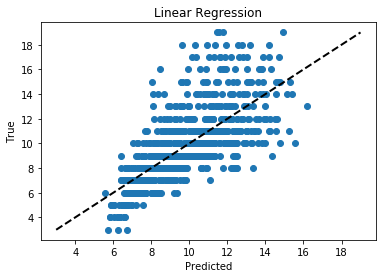

In [34]:
lr.fit(x_train,y_train)
print("score :", lr.score(x_train,y_train)*100)
predlr = lr.predict(x_test)
print(predlr)

print("r2 score is :", r2_score(y_test, predlr))
print("MSE :",mean_squared_error(y_test, predlr))
print("MAE :",mean_absolute_error(y_test, predlr))
print("\n")

plt.scatter(predlr, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression")
plt.show()


score : 29.111673703827957
[ 7.53097861  5.89574683 12.48062456 12.11999503 10.33692858 11.23189677
 14.7830243  13.44951584  7.22370968 10.05475241  9.71513441  9.8871962
  8.78789763  6.48170372 10.12198484 12.24179109  6.56090867  8.11831685
 11.25622382  8.57832904 10.32864162 14.67007242 11.33045902  7.05880826
  7.9228631  14.04727151  9.26189127  9.91449659  6.93864532  8.43938196
  5.89783992  8.93203972  7.88283559  8.25668222 10.24732604  9.61575026
  6.39561845  6.74195281  8.95703474  9.65400822  8.20228759  8.26833037
 10.93850809 10.67115571 12.12413917 11.51570567  9.32790535 11.35018164
  6.3632566   6.27423235 11.49076472 13.15786194  7.43524284 10.33364927
 13.67168216  8.57082868 10.57322711  8.17285666  8.18781575 14.24222041
 14.54566226 10.06614502 12.51793714  6.61511002 14.35157532 12.27081745
  8.24809084  8.88095382  7.7556891   9.49157859  8.1624662   8.0149941
  7.57490489 13.03556333 10.3709423   9.72139433  7.94878224  8.65970923
  8.02337776  7.21431176 1

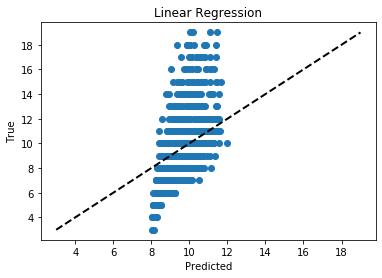

In [35]:
l.fit(x_train,y_train)
print("score :", l.score(x_train,y_train)*100)
predl = l.predict(x_test)
print(predlr)

print("r2 score is :", r2_score(y_test, predl))
print("MSE :",mean_squared_error(y_test, predl))
print("MAE :",mean_absolute_error(y_test, predl))
print("\n")

plt.scatter(predl, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression")
plt.show()


score : 52.81619706531286
[ 7.53097861  5.89574683 12.48062456 12.11999503 10.33692858 11.23189677
 14.7830243  13.44951584  7.22370968 10.05475241  9.71513441  9.8871962
  8.78789763  6.48170372 10.12198484 12.24179109  6.56090867  8.11831685
 11.25622382  8.57832904 10.32864162 14.67007242 11.33045902  7.05880826
  7.9228631  14.04727151  9.26189127  9.91449659  6.93864532  8.43938196
  5.89783992  8.93203972  7.88283559  8.25668222 10.24732604  9.61575026
  6.39561845  6.74195281  8.95703474  9.65400822  8.20228759  8.26833037
 10.93850809 10.67115571 12.12413917 11.51570567  9.32790535 11.35018164
  6.3632566   6.27423235 11.49076472 13.15786194  7.43524284 10.33364927
 13.67168216  8.57082868 10.57322711  8.17285666  8.18781575 14.24222041
 14.54566226 10.06614502 12.51793714  6.61511002 14.35157532 12.27081745
  8.24809084  8.88095382  7.7556891   9.49157859  8.1624662   8.0149941
  7.57490489 13.03556333 10.3709423   9.72139433  7.94878224  8.65970923
  8.02337776  7.21431176 10

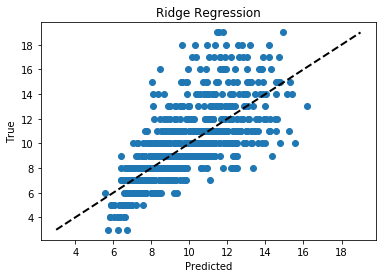

In [36]:
r.fit(x_train,y_train)
print("score :", r.score(x_train,y_train)*100)
predr = lr.predict(x_test)
print(predr)
print("r2 score is :", r2_score(y_test, predr))
print("MSE :",mean_squared_error(y_test, predr))
print("MAE :",mean_absolute_error(y_test, predr))
print("\n")

plt.scatter(predr, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Ridge Regression")
plt.show()

In [37]:
scr1 = cross_val_score(lr, x, y, cv=5)
scr2 = cross_val_score(l, x, y, cv=5)
scr3 = cross_val_score(r, x, y, cv=5)
print(scr1.mean(), scr2.mean(), scr3.mean())


0.4357460485350817 0.1615872331869564 0.43605476853166725


for this two models we got score of 52 percent lets hypertune it for further results

In [38]:
#As we know Vanilla linear regression doesn't have any hyperparameters. 
#But variants of linear regression do. Ridge regression and lasso both add a regularization term to linear regression 
#the weight for the regularization term is called the regularization parameter.

Hyperparameter tuning with gridsearch cv

In [39]:
lasso_params = {'alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'alpha':[550, 580, 600, 620, 650]}


In [40]:
grid1 = GridSearchCV(Lasso(), lasso_params, cv=5)
grid2 = GridSearchCV(Ridge(), ridge_params, cv=5)

In [41]:
grid1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.005, 0.02, 0.03, 0.05, 0.06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
grid2.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [550, 580, 600, 620, 650]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
print(grid1.best_params_)
print(grid2.best_params_)

{'alpha': 0.005}
{'alpha': 550}


In [44]:
Lasso_prediction = grid1.predict(x_test)
print(grid1.score(x_train,y_train))
print(Lasso_prediction)
print("r2 score is :", r2_score(y_test, Lasso_prediction))
print("MSE :",mean_squared_error(y_test, Lasso_prediction))
print("MAE :",mean_absolute_error(y_test, Lasso_prediction))


0.527084887506016
[ 7.62064557  5.92360538 12.53744412 12.18456722 10.35552068 11.20783117
 14.52315063 13.26101642  7.19209207 10.04851626  9.68541439  9.9154482
  8.71695046  6.46827599 10.02045291 12.1739763   6.53221485  8.56630974
 11.17701853  8.57892145 10.47077098 14.44146603 11.33032723  7.0826324
  7.8879989  13.8291505   9.35664112  9.96210175  6.92040733  8.44032102
  5.86142357  8.93450992  7.81638279  8.27692163 10.36385665  9.8021754
  6.08421185  6.72032989  8.88450876  9.673023    8.19145693  8.93456322
 10.93311598 10.61674208 12.17278531 11.52319629  8.87431191 11.20240166
  6.34881625  6.25439581 11.57310838 13.04064973  7.4199226  10.37399845
 13.42007064  8.71844325 10.57830039  8.15712974  8.23220044 14.21508835
 14.25051136 10.19438856 12.44133161  6.58478873 14.22111103 12.38219684
  8.25482485  8.94242571  7.79107044  9.54954388  8.18699898  7.99169892
  7.54974057 12.94133185 10.39529149  9.76105415  7.91263184  8.53341421
  8.00123916  7.25113753 10.47469411

In [45]:
Ridge_prediction = grid2.predict(x_test)
print(grid2.score(x_train,y_train))
print(Ridge_prediction)
print("r2 score is :", r2_score(y_test, Ridge_prediction))
print("MSE :",mean_squared_error(y_test, Ridge_prediction))
print("MAE :",mean_absolute_error(y_test, Ridge_prediction))


0.4528152650877883
[ 8.81079526  6.00256117 12.47499784 12.00873079 11.60424326 10.27675554
 13.70556326 11.436816    7.38410281  9.38744496 10.01615823  9.72925694
  8.23142976  6.92047542  9.12348125 11.75912365  6.6679462  11.33879757
 10.57919425  9.03285738 11.46682427 13.18595677 11.0407478   7.43050706
  8.02088844 12.85969971  9.43276452 10.84579775  7.02609878  8.42554522
  5.80346877  9.06605199  8.85481956  8.42429926 10.7848912   9.97305647
  7.29651705  6.86482811  8.50728296 10.51777879  7.81410493 10.77489516
 10.71660852 11.12865096 11.43511581 10.87593257  8.55390506 10.91648354
  6.42714218  6.37300274 10.45164874 11.45063003  7.7376783  10.41941655
 10.61191995  9.41047059 10.5775338   7.82129002  8.57493551 12.89023845
 12.66189324 10.76753926 11.27138449  6.55960126 12.97740875 11.84042022
  7.980695    9.08501052  8.40007026  9.37379975  9.30330777  8.20944986
  7.64296032 11.40032078  9.22930091 10.21318256  7.84484011  8.25954236
  8.246956    8.40026535 11.4627

After increasing Hyper parameter model Lasso stays the same and ridge has been increased to 45 percent

In [46]:
import joblib

In [47]:
joblib.dump(Lasso_prediction, "Lassomodel.obj")

['Lassomodel.obj']

In [48]:
model = joblib.load("Lassomodel.obj")

In [49]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
submission = pd.DataFrame({'original' : a, "predicted": predicted}, index=range(len(a)))

In [50]:
submission

,original,predicted
0,9,7.530979
1,5,5.895747
2,12,12.480625
3,12,12.119995
4,11,10.336929
...,...,...
801,11,9.069037
802,6,8.251958
803,13,11.164049
804,10,8.683274


As we can say there are some there is 52 percent of prediction while creating the model we can seea bit of underfitting and overfitting